## Histogram of the image values

In [2]:
from star_field_analyser.definitions import Paths
from star_field_analyser.image import RawImage
from star_field_analyser import list_observations, raw_to_df, grab_series
from tqdm import tqdm
from star_field_analyser.plot import rgb_histograms, subplots_grid

In [3]:
files = list_observations()
df = raw_to_df(files)

img_sky = RawImage(Paths.observations / "2024-11-05/IMG_3320.CR2").load()
img_black = RawImage(Paths.calibration / "2024-11-05/black_1.CR2").load()
img_white = RawImage(Paths.calibration / "2024-11-05/white_1.CR2").load()
img_sky.metadata.model_dump()

{'width': 5202,
 'height': 3465,
 'focal_length': 18.0,
 'aperture': 3.5,
 'shutter': 10.0,
 'iso': 6400,
 'timestamp': datetime.datetime(2024, 11, 5, 0, 37, 58),
 'camera': 'Canon EOS 1200D'}

100%|██████████| 3/3 [00:00<00:00,  3.98it/s]


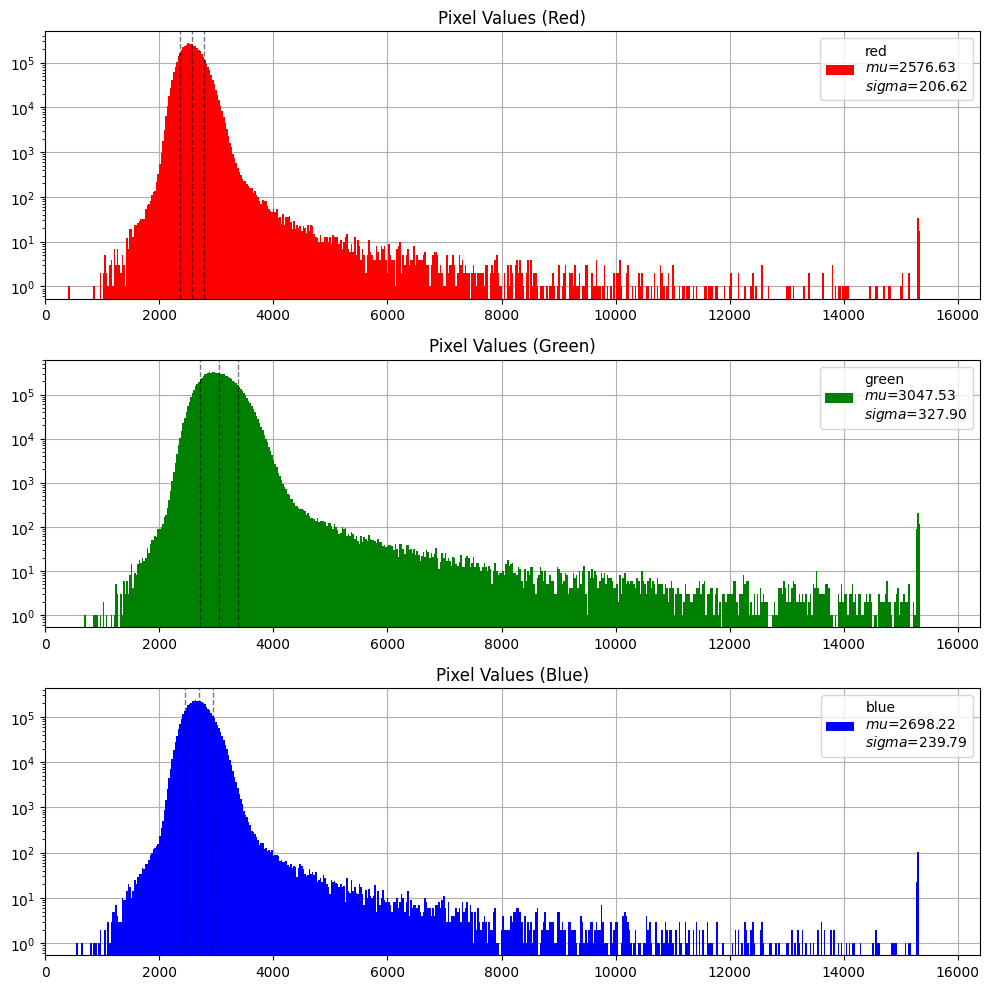

In [5]:
raw = img_sky.raw()
subplot_funcs = [[h] for h in rgb_histograms(raw, title="Pixel Values")]
fig = subplots_grid(subplot_funcs, figsize=(10, 10))
fig.savefig(Paths.data / "histograms_sky.pdf")
display(fig)

100%|██████████| 6/6 [00:01<00:00,  3.08it/s]


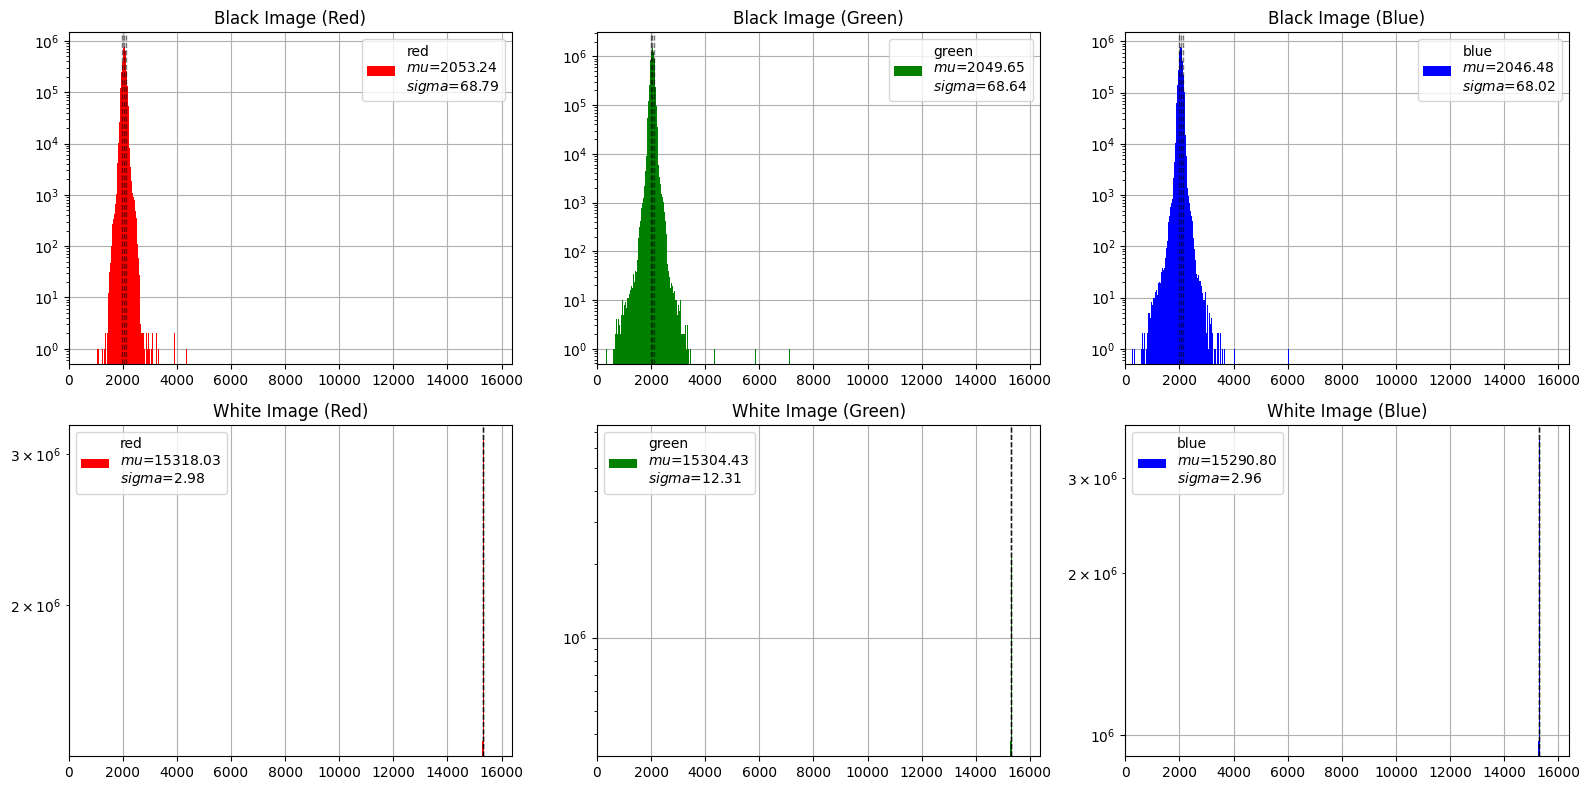

In [6]:
subplot_funcs = [
    rgb_histograms(img_black.raw(), title="Black Image"),
    rgb_histograms(img_white.raw(), title="White Image")
]
fig = subplots_grid(subplot_funcs, figsize=(16, 8))
fig.savefig(Paths.data / "histograms_calibration.pdf")
display(fig)

Load images


100%|██████████| 8/8 [00:18<00:00,  2.34s/it]


Plot histograms


100%|██████████| 24/24 [00:05<00:00,  4.03it/s]


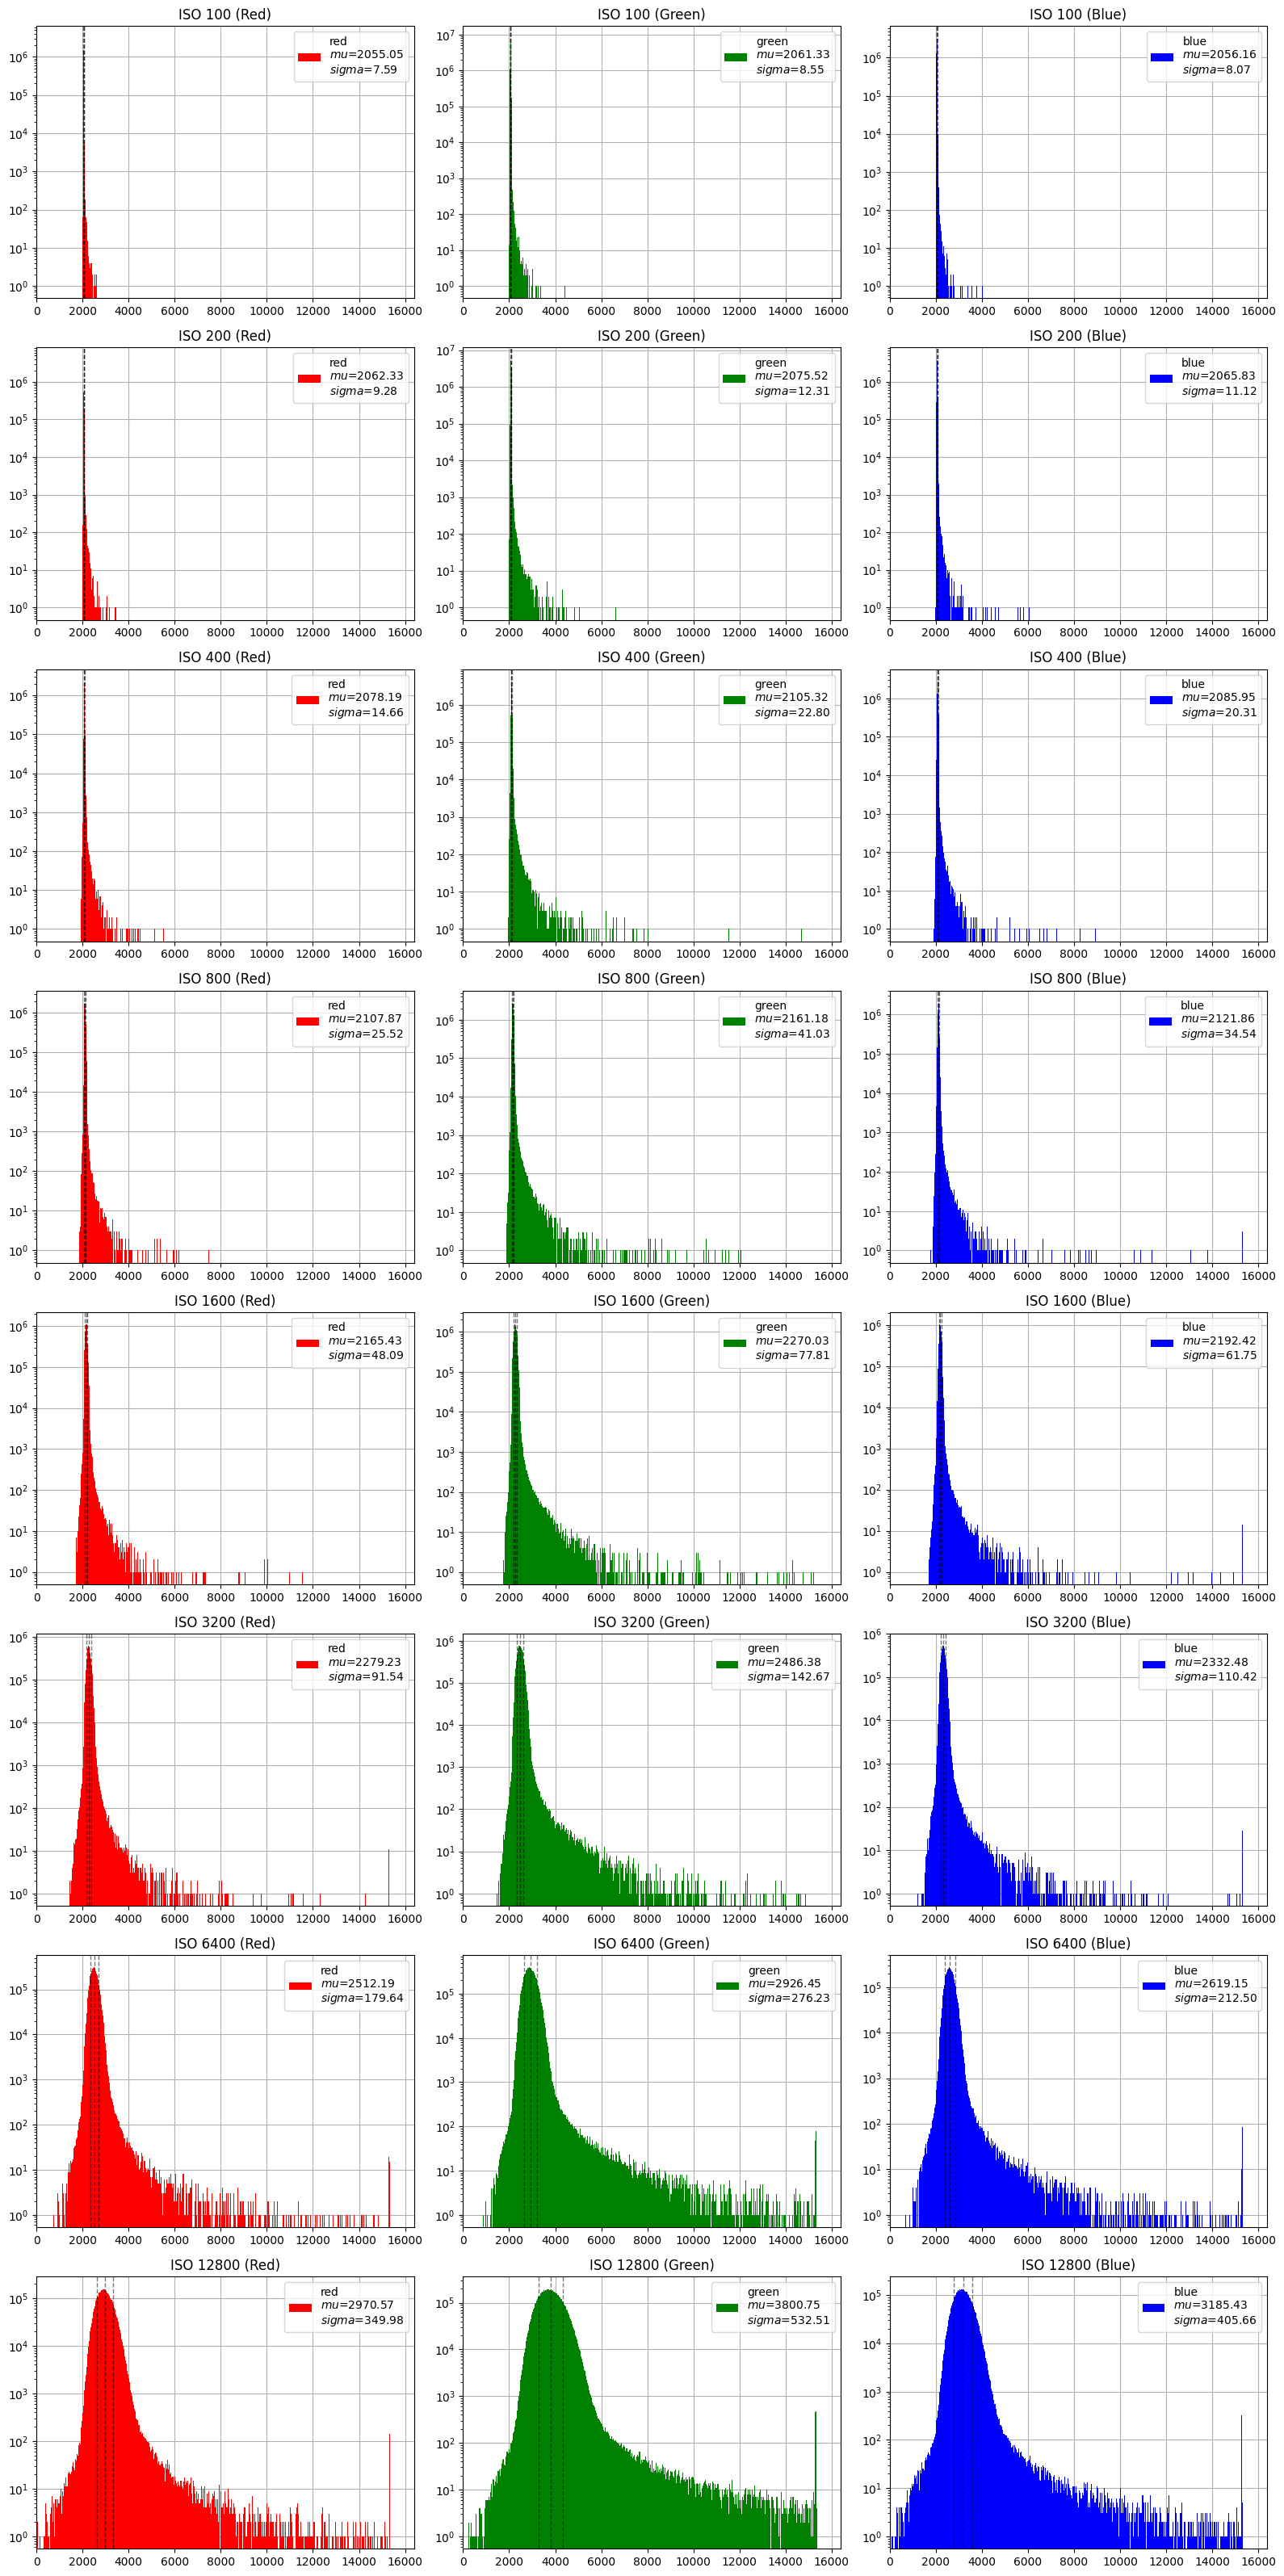

In [7]:
iso_series = grab_series(df, "iso")
n_iso = len(iso_series)

print("Load images")
imgs = [
    (row["iso"], RawImage(Paths.data / row["filepath"]).load())
    for _, row in tqdm(iso_series.iterrows(), total=n_iso)
]

print("Plot histograms")
subplot_funcs = [rgb_histograms(img.raw(), title=f"ISO {iso}") for iso, img in imgs]
fig = subplots_grid(subplot_funcs, figsize=(16, 4*n_iso))
fig.savefig(Paths.data / "histograms_iso.pdf")
display(fig)

Load images


  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:18<00:00,  2.34s/it]


Plot histograms


100%|██████████| 24/24 [00:06<00:00,  3.89it/s]


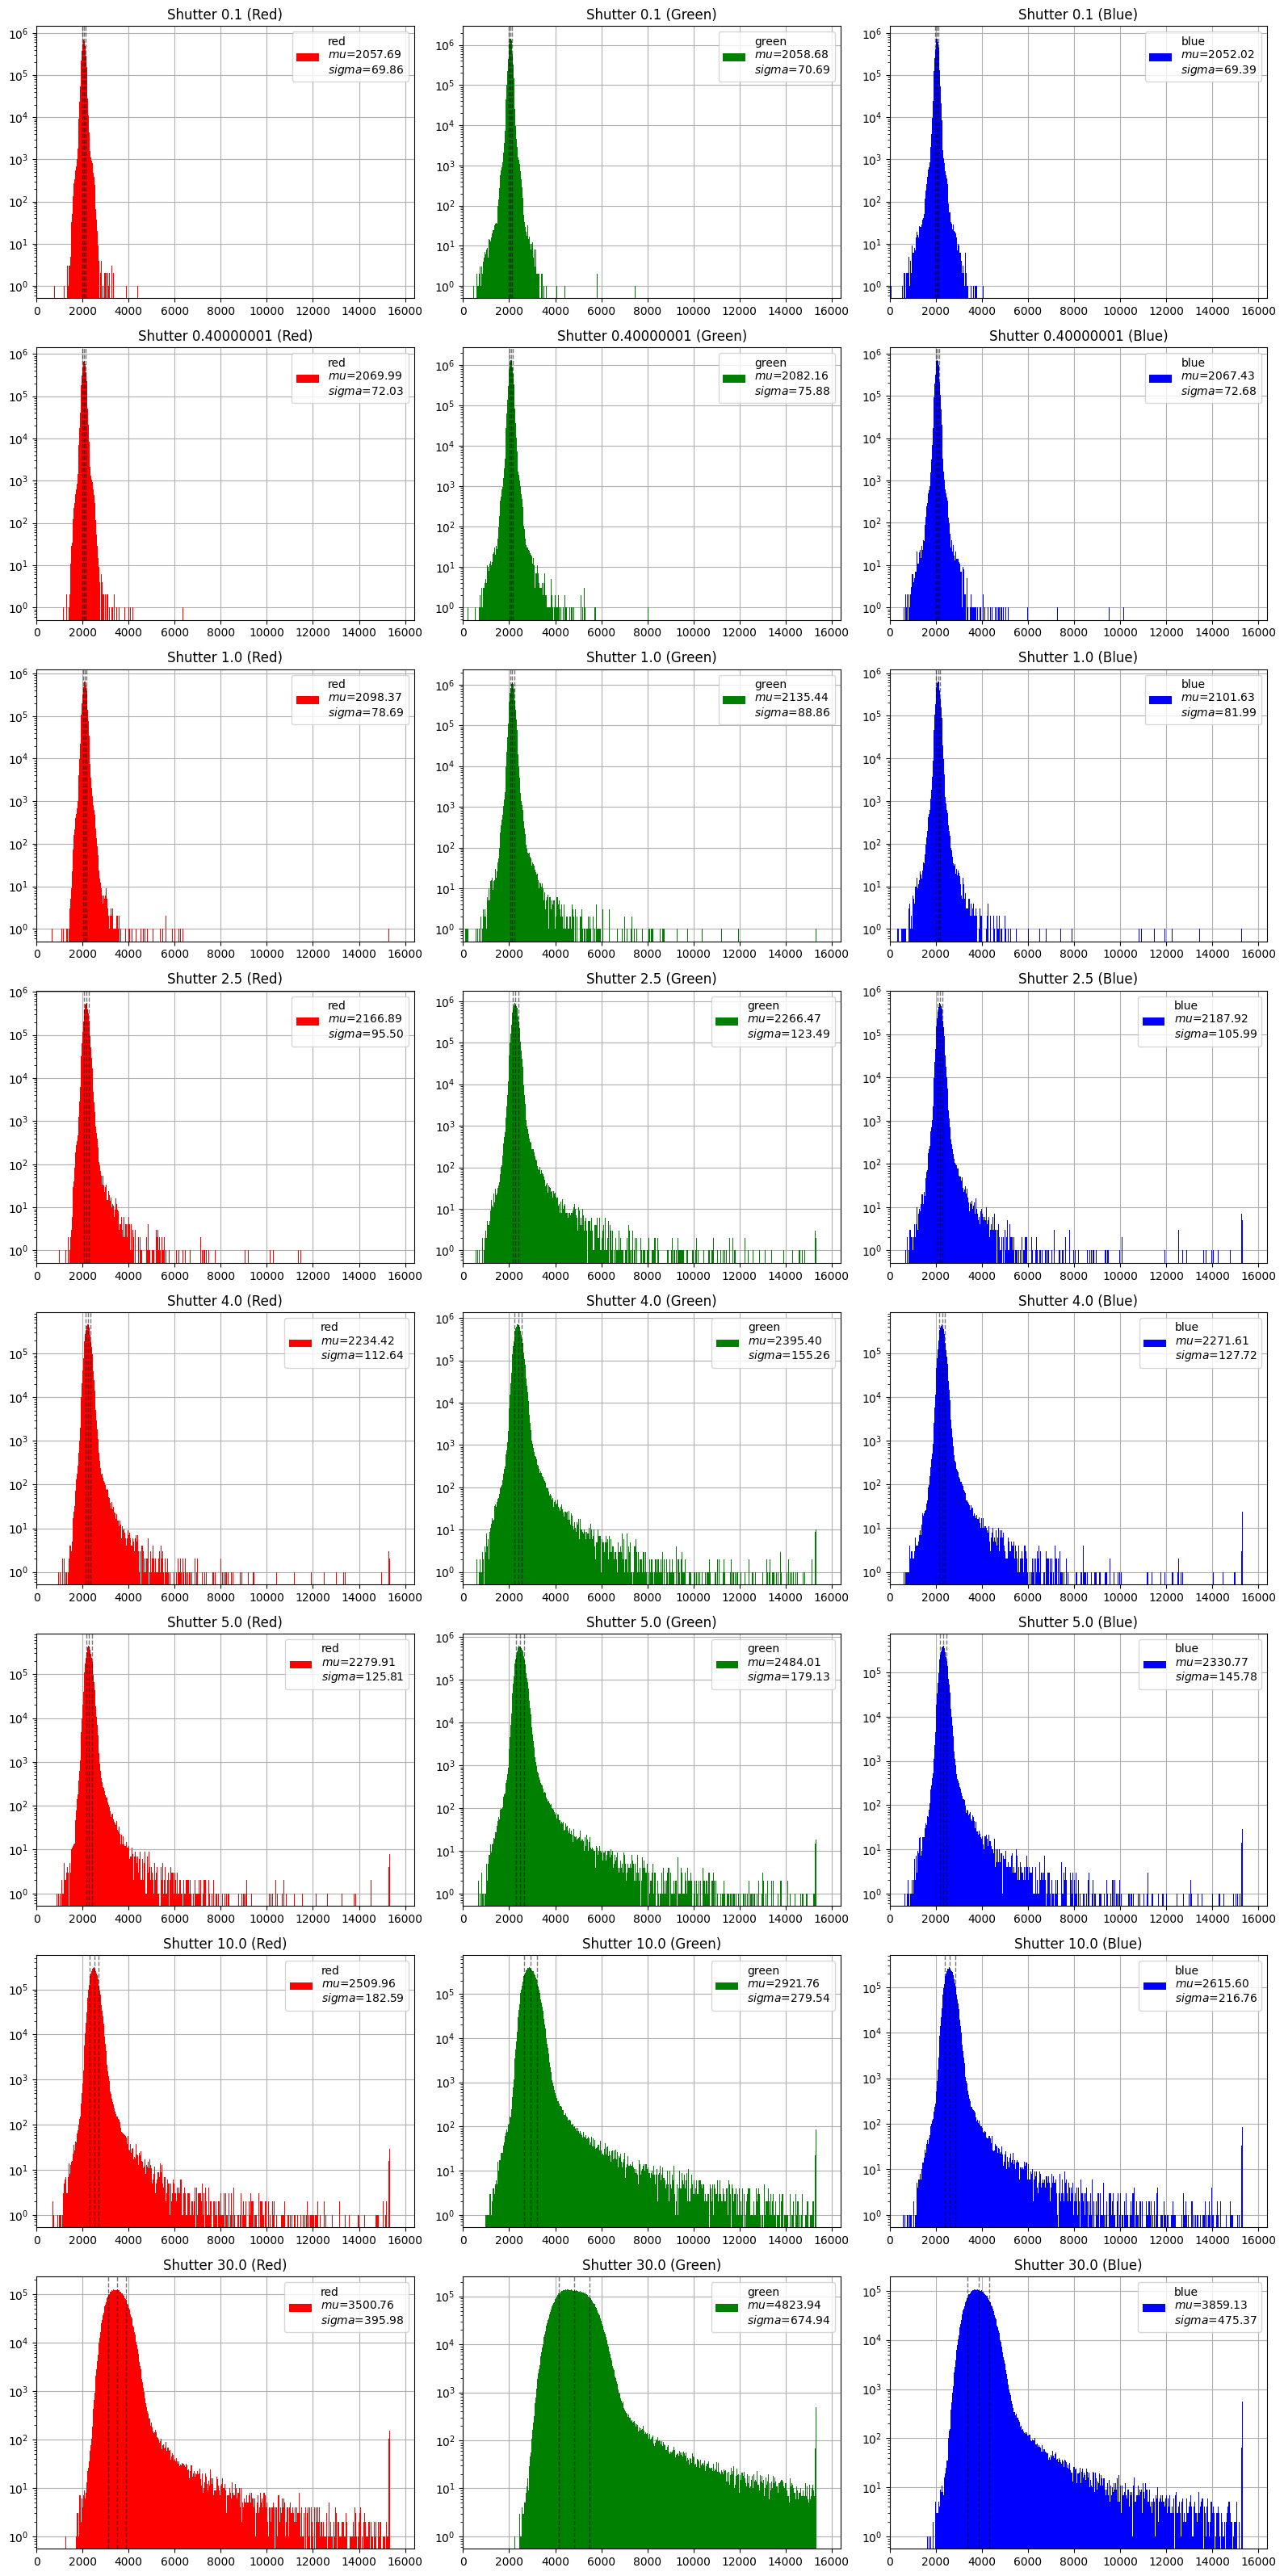

In [8]:
shutter_series = grab_series(df, "shutter")
n_shutter = len(shutter_series)

print("Load images")
imgs = [
    (row["shutter"], RawImage(Paths.data / row["filepath"]).load())
    for _, row in tqdm(shutter_series.iterrows(), total=n_shutter)
]

print("Plot histograms")
subplot_funcs = [rgb_histograms(img.raw(), title=f"Shutter {shutter}") for shutter, img in imgs]
fig = subplots_grid(subplot_funcs, figsize=(16, 4*n_shutter))
fig.savefig(Paths.data / "histograms_shutter.pdf")
display(fig)